In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=da0286b3d86df84f307b63b7de035a39


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.

    try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
            print("City not found. Skipping...")
            pass

 # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 50 of Set 12 | hot springs
Processing Record 51 of Set 12 | rikitea
Processing Record 52 of Set 12 | mahebourg
Processing Record 53 of Set 12 | saskylakh
Processing Record 54 of Set 12 | mae sot
Processing Record 55 of Set 12 | barrow
Processing Record 56 of Set 12 | tuktoyaktuk
Processing Record 57 of Set 12 | new norfolk
Processing Record 58 of Set 12 | torbay
Processing Record 59 of Set 12 | east london
Processing Record 60 of Set 12 | fort nelson
Processing Record 61 of Set 12 | iqaluit
Processing Record 62 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 63 of Set 12 | kapaa
Processing Record 64 of Set 12 | albany
Processing Record 65 of Set 12 | sao filipe
Processing Record 66 of Set 12 | charleston
Processing Record 67 of Set 12 | grindavik
Processing Record 68 of Set 12 | thompson
Processing Record 69 of Set 12 | ahipara
Processing Record 70 of Set 12 | souillac
Processing Record 71 of Set 12 | fortuna
Processing Record 72 of Set 12 | bato

Processing Record 33 of Set 15 | oksfjord
Processing Record 34 of Set 15 | cherskiy
Processing Record 35 of Set 15 | udachnyy
Processing Record 36 of Set 15 | kaitangata
Processing Record 37 of Set 15 | georgetown
Processing Record 38 of Set 15 | ukiah
Processing Record 39 of Set 15 | faya
Processing Record 40 of Set 15 | gat
Processing Record 41 of Set 15 | togur
Processing Record 42 of Set 15 | farmington
Processing Record 43 of Set 15 | vila velha
Processing Record 44 of Set 15 | kandrian
Processing Record 45 of Set 15 | butaritari
Processing Record 46 of Set 15 | eskasem
City not found. Skipping...
Processing Record 47 of Set 15 | gympie
Processing Record 48 of Set 15 | hasaki
Processing Record 49 of Set 15 | gedo
Processing Record 50 of Set 15 | rio gallegos
Processing Record 1 of Set 16 | norman wells
Processing Record 2 of Set 16 | shibetsu
Processing Record 3 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 16 | lata
Processing Record 5 of Set 16 | e

Processing Record 16 of Set 19 | sloboda
Processing Record 17 of Set 19 | kuala terengganu
Processing Record 18 of Set 19 | antalaha
Processing Record 19 of Set 19 | sofiysk
City not found. Skipping...
Processing Record 20 of Set 19 | tiznit
Processing Record 21 of Set 19 | castlebar
Processing Record 22 of Set 19 | dianopolis
City not found. Skipping...
Processing Record 23 of Set 19 | san patricio
Processing Record 24 of Set 19 | tasiilaq
Processing Record 25 of Set 19 | the valley
Processing Record 26 of Set 19 | maykain
City not found. Skipping...
Processing Record 27 of Set 19 | pimentel
Processing Record 28 of Set 19 | thinadhoo
Processing Record 29 of Set 19 | san angelo
Processing Record 30 of Set 19 | dien bien
City not found. Skipping...
Processing Record 31 of Set 19 | karaul
City not found. Skipping...
Processing Record 32 of Set 19 | sandpoint
Processing Record 33 of Set 19 | puri
Processing Record 34 of Set 19 | lagoa
Processing Record 35 of Set 19 | narsaq
Processing Rec

Processing Record 47 of Set 22 | maloshuyka
City not found. Skipping...
Processing Record 48 of Set 22 | rawson
Processing Record 49 of Set 22 | madinat sittah uktubar
Processing Record 50 of Set 22 | hareid
Processing Record 1 of Set 23 | solnechnyy
Processing Record 2 of Set 23 | grahamstown
Processing Record 3 of Set 23 | mariental
Processing Record 4 of Set 23 | hobyo
Processing Record 5 of Set 23 | mentok
City not found. Skipping...
Processing Record 6 of Set 23 | yingcheng
Processing Record 7 of Set 23 | novyy starodub
Processing Record 8 of Set 23 | bur gabo
City not found. Skipping...
Processing Record 9 of Set 23 | visby
Processing Record 10 of Set 23 | salinopolis
Processing Record 11 of Set 23 | cayenne
Processing Record 12 of Set 23 | kanigoro
Processing Record 13 of Set 23 | eyl
Processing Record 14 of Set 23 | patiya
Processing Record 15 of Set 23 | mangan
Processing Record 16 of Set 23 | elizabeth city
Processing Record 17 of Set 23 | sola
Processing Record 18 of Set 23 

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jaisinghnagar,23.7000,81.3833,76.23,84,92,7.74,IN,2022-07-18 23:17:44
1,Hot Springs,34.5037,-93.0552,82.40,83,27,1.99,US,2022-07-19 04:58:10
2,Rikitea,-23.1203,-134.9692,74.48,74,4,12.80,PF,2022-07-19 04:58:11
3,Mahebourg,-20.4081,57.7000,71.26,68,75,19.57,MU,2022-07-19 04:58:11
4,Saskylakh,71.9167,114.0833,44.37,64,100,15.39,RU,2022-07-19 04:58:12
5,Mae Sot,16.7167,98.5667,91.42,74,40,6.91,TH,2022-07-19 04:58:12
6,Barrow,71.2906,-156.7887,42.82,75,100,17.27,US,2022-07-19 04:58:13
7,Tuktoyaktuk,69.4541,-133.0374,66.20,72,75,4.61,CA,2022-07-19 04:58:13
8,New Norfolk,-42.7826,147.0587,49.50,61,45,1.72,AU,2022-07-19 04:58:13
9,Torbay,47.6666,-52.7314,62.89,86,81,18.10,CA,2022-07-19 04:58:14


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity","Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order ]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jaisinghnagar,IN,2022-07-18 23:17:44,23.7000,81.3833,76.23,84,92,7.74
1,Hot Springs,US,2022-07-19 04:58:10,34.5037,-93.0552,82.40,83,27,1.99
2,Rikitea,PF,2022-07-19 04:58:11,-23.1203,-134.9692,74.48,74,4,12.80
3,Mahebourg,MU,2022-07-19 04:58:11,-20.4081,57.7000,71.26,68,75,19.57
4,Saskylakh,RU,2022-07-19 04:58:12,71.9167,114.0833,44.37,64,100,15.39
5,Mae Sot,TH,2022-07-19 04:58:12,16.7167,98.5667,91.42,74,40,6.91
6,Barrow,US,2022-07-19 04:58:13,71.2906,-156.7887,42.82,75,100,17.27
7,Tuktoyaktuk,CA,2022-07-19 04:58:13,69.4541,-133.0374,66.20,72,75,4.61
8,New Norfolk,AU,2022-07-19 04:58:13,-42.7826,147.0587,49.50,61,45,1.72
9,Torbay,CA,2022-07-19 04:58:14,47.6666,-52.7314,62.89,86,81,18.10


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658262602.3186164

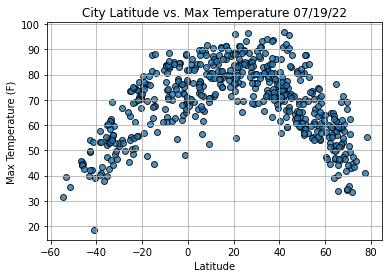

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

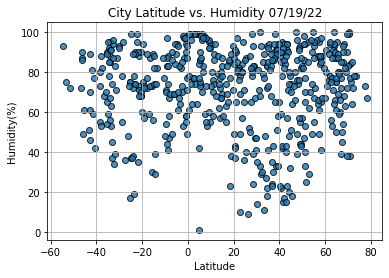

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs.humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

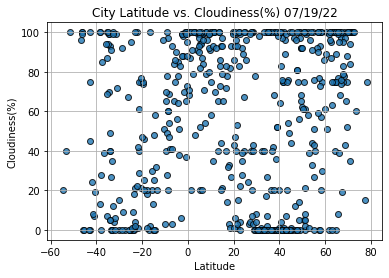

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

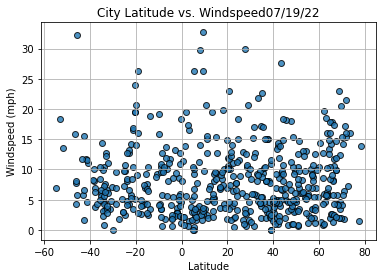

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed"+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

    
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

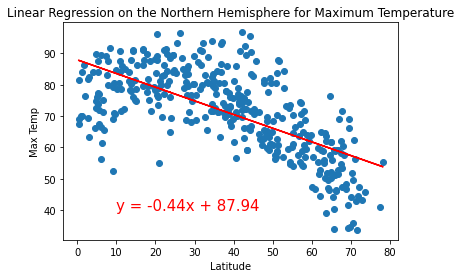

LinregressResult(slope=-0.43641763518023097, intercept=87.94314788547943, rvalue=-0.6626297744414847, pvalue=2.196455164094533e-48, stderr=0.025643755987203077, intercept_stderr=1.111472044621255)


In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

print(linregress(x_values, y_values))


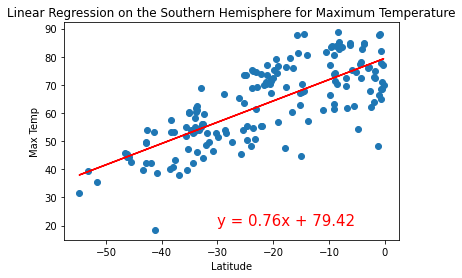

LinregressResult(slope=0.7564036552838768, intercept=79.42178175857003, rvalue=0.7549656180927858, pvalue=7.254694160508044e-32, stderr=0.05130413155246871, intercept_stderr=1.3236409331328352)


In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,20))


print(linregress(x_values, y_values))

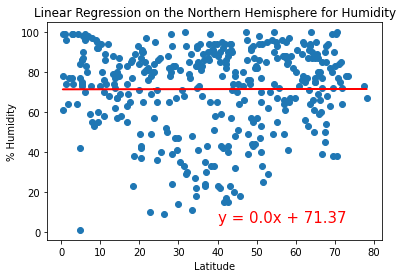

LinregressResult(slope=0.0014409060807849053, intercept=71.36973373013312, rvalue=0.0013570470460696634, pvalue=0.9791889815472923, stderr=0.05520005471107382, intercept_stderr=2.3925246248458807)


In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', '% Humidity',(40,5))

print(linregress(x_values, y_values))

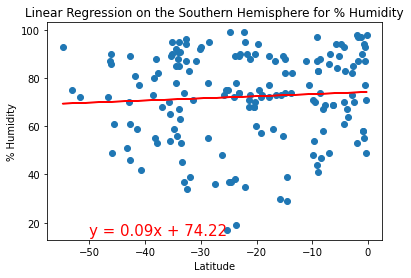

LinregressResult(slope=0.08823946444736154, intercept=74.22047270362553, rvalue=0.06736259727454198, pvalue=0.38850694837509203, stderr=0.10205505476959845, intercept_stderr=2.63300915225518)


In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


print(linregress(x_values, y_values))

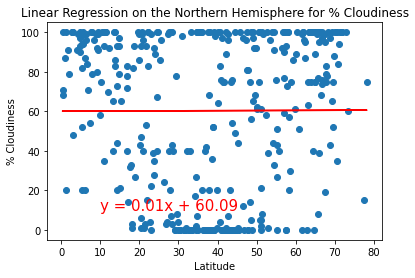

LinregressResult(slope=0.006157924766353212, intercept=60.090229087444285, rvalue=0.0032258376933696166, pvalue=0.9505560815731726, stderr=0.09924045453056082, intercept_stderr=4.301358621618037)


In [79]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,10))


print(linregress(x_values, y_values))

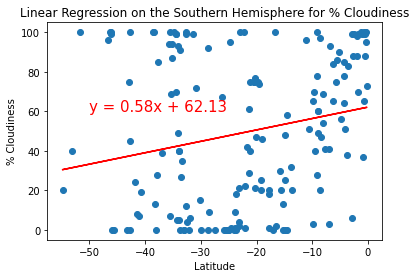

LinregressResult(slope=0.5775521727153456, intercept=62.13389300545905, rvalue=0.2155254841939692, pvalue=0.005291674332802029, stderr=0.20433469912441427, intercept_stderr=5.271812691027653)


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
print(linregress(x_values, y_values))

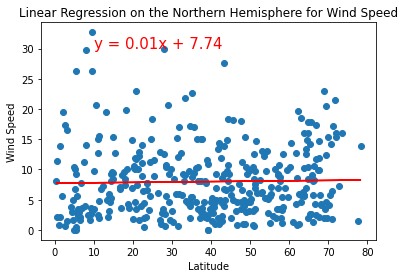

LinregressResult(slope=0.006550273643695215, intercept=7.735710646233921, rvalue=0.023227349150322832, pvalue=0.6552032875226507, stderr=0.01465688730009914, intercept_stderr=0.6352704534918364)


In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))
print(linregress(x_values, y_values))

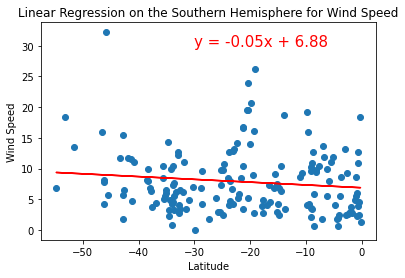

LinregressResult(slope=-0.04538390379253706, intercept=6.875030034756749, rvalue=-0.12112434218541561, pvalue=0.12006166828146544, stderr=0.029042841421875815, intercept_stderr=0.7493021040842636)


In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))
print(linregress(x_values, y_values))